In [1]:
import re
import os
import pandas as pd
from heapq import nlargest
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
master_array = [] #append results to array to create data frame
mostcommon = {}
mostcommon["Monica"] = {}
mostcommon["Rachel"] = {}
mostcommon["Phoebe"] = {}
mostcommon["Chandler"] = {}
mostcommon["Ross"] = {}
mostcommon["Joey"] = {}
for filename in os.listdir('season/'):
    if filename.endswith(".html"):
        split_name = filename.split('.') #obtain the season and episodes
        season = split_name[0]   
        episode = split_name[1]
        #TODO method to get each line of the script
        master_array.append([season, episode])
    else:
        pass
for num, ep in enumerate(master_array):
    filename=master_array[num][0]+'.'+master_array[num][1]

    f = open('season/'+filename, 'r')
    data = f.read()

    soup = BeautifulSoup(data)
    readsoup = BeautifulSoup(data)

    soup = soup.get_text().translate(str.maketrans({'\n': ' ', '\xa0': ''}))
    pattern = re.compile(r'\s(?=\w+(?=:))') # store the regex
    result = re.split(pattern, soup) # split the script where our pattern matched (pink dot)


    episode_array=[]
    for item in result:
        split_line = item.split(': ')
        try:
            character = split_line[0]
            speech = split_line[1]
            episode_array.append([character, speech])
        except:
            pass
    
    df = pd.DataFrame(episode_array, columns = ['Person','Said'])

    df['Person'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                        'JOEY':'Joey',
                        'MNCA':'Monica','MONICA':'Monica',
                        'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                        'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                        'ROSS':'Ross'},inplace=True)

    curved = re.compile("(\(.*?\))")
    brackets = re.compile("(\[.*?\])")
    scene = re.compile("\[Scene")
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(curved, '', i)

    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(brackets, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(scene, '', i)

    worddicts = {}
    worddicts['Monica'] = {}
    worddicts["Rachel"]={}
    worddicts["Phoebe"]={}
    worddicts["Chandler"]={} 
    worddicts["Ross"]={} 
    worddicts["Joey"]={}
    for i, j in enumerate(df["Person"]):
        if j in worddicts:
            wordlist = Counter((x.rstrip(punctuation).lower() for x in df.iloc[i][1].split()))
            for word in wordlist:
                try:
                    worddicts[j][word] = worddicts[j][word]+1
                except KeyError:
                    worddicts[j][word] = 1
                    
    for p in worddicts:
        for key in worddicts[p].keys():
            try:
                mostcommon[p][key] = mostcommon[p][key]+worddicts[p][key]
            except:
                mostcommon[p][key] = worddicts[p][key]

In [2]:
mostcommonall = {}
for d in mostcommon:
    mostcommonall = {k: mostcommonall.get(k, 0) + mostcommon[d].get(k, 0) 
                     for k in set(mostcommonall) | set(mostcommon[d])}
#print(mostcommonall["is"])
#for d in mostcommon:
#    print(mostcommon[d]["is"])

In [3]:
###Import all modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import heapq
import os
import re
from bs4 import BeautifulSoup as htmltotxt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

###Creates dataframe with features

#master_array = [] #append results to array to create data frame
#for filename in os.listdir('season/'):
#  split_name = filename.split('.') #obtain the season and episodes
#  season = split_name[0]   
#  episode = split_name[1]
#  #TODO method to get each line of the script
#  master_array.append([season, episode])
master_dict = dict()
feature_dict = dict()
num_words = 100

#top5monica = ['cooking','chandler?','work','joey','boots']
#top5joey = ['dude','casting','chandler?','agent','director']
#top5phoebe = ['la','massage','smelly','yay!','buffay']
#top5rachel = ['mon','barry','joshua','plane','ugh!']
#top5ross = ['julie','dude','mon','justjust','elizabeth']
#top5chandler = ['tulsa','kathy','joe!','gym','ring!']

single_words = nlargest(num_words, mostcommonall, key=mostcommonall.get)
Features = ["Number of lines","Number of words","Words per line","Exclamation marks","Question marks","Character",
           "unique_words"]
Features.extend(single_words)
for feat in Features:
    master_dict[feat] = []
    feature_dict[feat] = 0

chars = ['rachel','phoebe','chandler','ross','joey','monica']


for filename in os.listdir('season/'):  
    f = open('season/'+filename, 'r')

    data = htmltotxt(f.read()).get_text() #reads f as html file and converts into txt
    
    name_dict = dict()
    for char in chars:
        name_dict[char] = feature_dict.copy()

    pattern = re.compile(r'\s(?=\w+(?=:))') #store the regex
    result = re.split(pattern, data) # split the script where our pattern matched (pink dot)

    episode_array=[]
    for item in result:
        split_line = item.split(':')
        try:
            character = split_line[0]
            speech = split_line[1]
            episode_array.append([character, speech])
        except:
            pass
    unique_words_char = {'monica': []
              ,'joey': []
              ,'phoebe': []
              ,'rachel': []
              ,'ross': []
              ,'chandler':[]}
    
    i = 0
    while(len(episode_array) > i):
        if episode_array[i][0].lower() not in chars:
            del episode_array[i]
        else:
            character =episode_array[i][0].lower()
            sentence =episode_array[i][1].lower()
            #episode_array[i][1] = re.sub('[()]', '', episode_array[i][1])
            #episode_array[i][1] = re.sub('-[^-]+-', '', episode_array[i][1]) #removes everything within --        
            sentence = sentence.replace("-","").replace("\n"," ").replace("\xa0"," ").replace(",","").replace(".","").replace(":","").replace("'","").replace("opening credits","").replace("closing credits","").replace("ending credits","").replace("commercial break","").replace("\x92","")
            sentence = re.sub("[\(\[].*?[\)\]]", "", sentence) #removes everything withing () and []
            sentence = re.sub('\[.*', '', sentence)
            sentence = re.sub('\(.*', '', sentence)
            sentence = sentence.strip()
            if len(episode_array) == i+1: #last sentence
                sentence = sentence[:len(sentence)-3] #delets "end" in the end
                sentence = sentence.strip()

            words = sentence.split()
            
            
            
            name_dict[character]["Number of lines"] +=1
            name_dict[character]["Number of words"] +=len(words)
            name_dict[character]["Exclamation marks"] += sentence.count('!')
            name_dict[character]["Question marks"] += sentence.count('?')
            
            episode_array[i][1].replace('chan','chandler').replace('chandlers','chandler').replace('mnca','monica').replace('phoe','phoebe').replace('pheebs','phoebe').replace('rache','rachel').replace('rach','rachel')
            for word in words:
                if word not in unique_words_char[character]:
                    unique_words_char[character].append(word)
            
            for single_word in single_words:
                name_dict[character][single_word] += sentence.count(single_word)
            
                
            i +=1
    for char in chars:
        if name_dict[char]["Number of lines"] != 0:
            name_dict[char]["Words per line"] = name_dict[char]["Number of words"]/name_dict[char]["Number of lines"]

        master_dict["Number of lines"].append(name_dict[char]["Number of lines"])
        master_dict["Number of words"].append(name_dict[char]["Number of words"])
        master_dict["Words per line"].append(name_dict[char]["Words per line"])
        master_dict["Exclamation marks"].append(name_dict[char]["Exclamation marks"])
        master_dict["Question marks"].append(name_dict[char]["Question marks"])
        master_dict["Character"].append(char)
        master_dict["unique_words"].append(len(unique_words_char[char]))
        for single_word in single_words:
            master_dict[single_word].append(name_dict[char][single_word])
        
        
        #master_dict["top5monica"].append(name_dict[j]["top5monica"])
        #master_dict["top5joey"].append(name_dict[j]["top5joey"])
        #master_dict["top5phoebe"].append(name_dict[j]["top5phoebe"])
        #master_dict["top5rachel"].append(name_dict[j]["top5rachel"])
        #master_dict["top5ross"].append(name_dict[j]["top5ross"])
        #master_dict["top5chandler"].append(name_dict[j]["top5chandler"])

#print(master_dict)

epinfo2 = pd.DataFrame.from_dict(master_dict, orient='index')
#epinfo.transpose().to_csv('epinfo.csv', index=False)

pd.set_option('display.max_rows', epinfo2.transpose().shape[0]+1)
epinfo2 = epinfo2.transpose()
epinfo2

,Number of lines,Number of words,Words per line,Exclamation marks,Question marks,Character,unique_words,you,i,the,...,you're,they,time,chandler,say,then,little,were,because,y’know
0,49,682,13.918367,28,16,rachel,297,31,201,15,...,0,1,1,0,2,2,0,2,0,0
1,19,259,13.631579,7,4,phoebe,157,10,84,6,...,0,0,1,0,0,2,0,0,0,0
2,39,384,9.846154,9,8,chandler,217,12,123,11,...,0,0,1,0,2,1,1,1,1,0
3,47,512,10.893617,14,21,ross,281,26,131,16,...,0,1,3,1,0,0,1,1,0,0
4,41,444,10.829268,20,16,joey,247,30,111,22,...,0,0,0,3,3,0,2,2,0,0
5,73,662,9.068493,25,40,monica,318,40,169,21,...,0,1,1,1,1,0,2,2,0,0
6,38,384,10.105263,13,18,rachel,211,24,112,8,...,0,1,0,0,0,0,1,2,0,0
7,14,115,8.214286,11,0,phoebe,85,10,37,2,...,0,0,0,0,0,1,0,1,0,0
8,16,232,14.5,2,6,chandler,153,6,72,13,...,0,0,0,0,0,1,0,3,0,0
9,63,657,10.428571,8,33,ross,302,23,176,36,...,0,7,1,0,2,1,1,1,0,0


In [58]:
import xgboost as xgb
from sklearn.experimental import enable_hist_gradient_boosting
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nnb
import sklearn.tree as skl_tr
import sklearn.neural_network as skl_nn
import sklearn.ensemble as skl_em
import sklearn.naive_bayes as skl_nb
import sklearn.svm as skl_svm
import sklearn.model_selection as skl_ms
import sklearn.inspection as skl_in
import numpy as np
import pandas as pd
import sklearn.preprocessing as skl_pre
import math
import itertools
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
epinfo = pd.read_csv('epinfo.csv')
num_words = 100
for word in nlargest(num_words, mostcommonall, key=mostcommonall.get):
    epinfo = epinfo.join(epinfo2[word])
    epinfo[word] = pd.to_numeric(epinfo[word])
features = [#'Episode', 
            'Number of lines', 
            'Number of words', 
            'Different words used',
            'Words per line', 
            'Different words ratio',
            'Exclamation marks', 
            'Question marks',
            'Periods',
            'Apostrophe',
            'Pronouns',
            'Pronouns per line',
            'Commas',
            'Commas per line',
            'Word',
            'Word2',
            'Phrase',
            #'Phrase2',
            #'Phrase3',
            #'Phrase4',
            "Most common Monica",
            "Most common Rachel",
            "Most common Phoebe",
            "Most common Chandler",
            "Most common Ross",
            "Most common Joey",
            "Name Monica",
            "Name Rachel",
            "Name Phoebe",
            "Name Joey",
            "Name Chandler",
            "Name Ross",
            "Name total",
             ]
#features = [] #Use only to test most common single word features
features.extend(nlargest(num_words, mostcommonall, key=mostcommonall.get))
num_features = len(features)
n_fold = 10
n_comp = len(features)
numneigh=7
Y_encode = [4, 3, 0, 5, 1, 2]*229
def aic(model, Y, Y_hat):
    k = model.coef_.size + model.get_params()['fit_intercept'] + 1
    n = Y.size
    loglik = np.sum(np.log(model.predict_proba(X)[np.arange(n), Y_encode]))
    return 2 * (k - loglik)

#model = skl_lm.LogisticRegression(solver='newton-cg', multi_class='multinomial', max_iter=10000, 
#                                                                penalty='l2', fit_intercept = False)
#model = skl_da.QuadraticDiscriminantAnalysis()
#model = skl_nnb.KNeighborsClassifier(n_neighbors=numneigh)
#model = skl_tr.DecisionTreeClassifier()
#model = skl_nn.MLPClassifier(solver = 'adam', max_iter=200, )
#model = skl_em.AdaBoostClassifier(n_estimators=50)
#model = skl_em.BaggingClassifier(n_estimators=100)
model = skl_em.GradientBoostingClassifier() #warm_start=True op?
#model = skl_em.ExtraTreesClassifier()
#model = skl_em.HistGradientBoostingClassifier()
#model = skl_nb.ComplementNB()
#model = skl_svm.LinearSVC(max_iter = 10000)
#model = skl_em.RandomForestClassifier()
#model = xgb.XGBClassifier(eval_metric='mlogloss')

primeacc = [0]
primeAIC = [np.inf]
best_features = []
best_fAIC = []
#for features in itertools.combinations(factors, num_features):
#for numneigh in range(1, 50):
X = epinfo[list(features)]
Y = epinfo['Character']
cv = skl_ms.KFold(n_splits = n_fold, shuffle = True)
accuracy = []
for train_index, val_index in cv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
    #scaler = skl_pre.StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_val = scaler.transform(X_val)
    #pca = PCA(n_components = n_comp)
    #X_train = pca.fit_transform(X_train)
    #X_val = pca.transform(X_val)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_val)
    accuracy.append(np.mean(prediction==Y_val))
if np.mean(accuracy) > max(primeacc):
    best_features = list(features)
    #explained_variance = pca.explained_variance_ratio_
    principalComponents = X_train
#if aic(model, Y, Y_encode) < min(primeAIC):
    #best_fAIC = list(features)
#primeAIC.append(aic(model, Y, Y_encode))
primeacc.append(np.mean(accuracy))

print(np.max(primeacc))
print(model.feature_importances_)
print(skl_in.permutation_importance(model, X_val, Y_val))
#print(np.min(primeAIC))
#print('Best features for accuracy')
#print(best_features)
#print(pd.crosstab(prediction, Y_val))
#print('Best features for low AIC')
#print(best_fAIC)

pcplot = []
for i in range(n_comp):
    pcplot.append(f'PC{i+1}')
#plt.bar(pcplot, explained_variance)
#plt.show()

#plt.figure(figsize=(15, 15), dpi=100)
#print(pca.explained_variance_ratio_)
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = pcplot)#['principal component 1', 'principal component 2','principal component 3'])
#plt.matshow(pca.components_,cmap='viridis', fignum=1)
#plt.yticks(list(range(n_comp)), pcplot#['1st Comp','2nd Comp','3rd Comp']
#           ,fontsize=7)
#plt.xticks(list(range(n_comp)), features#['1st Comp','2nd Comp','3rd Comp']
#           ,fontsize=7, rotation=90)
#plt.colorbar()
#plt.show()

0.7693377763672908
[0.00942073 0.00419361 0.00671839 0.00933774 0.01564777 0.00507351
 0.00643178 0.00322871 0.00137049 0.00463279 0.00791532 0.00123035
 0.01253135 0.02316355 0.         0.00289432 0.08912771 0.09508842
 0.08905904 0.08716156 0.08356218 0.08199086 0.01095283 0.01039444
 0.00499387 0.00854983 0.01052395 0.02174193 0.00449205 0.0034871
 0.00116856 0.00178484 0.00051227 0.00127705 0.00089468 0.00098918
 0.05086432 0.00215191 0.00596477 0.00081944 0.00012446 0.0020111
 0.00420514 0.00394679 0.00099807 0.01514414 0.00112937 0.00381139
 0.00124852 0.00094104 0.00274982 0.00160147 0.00364375 0.00255548
 0.00268352 0.0180039  0.00119018 0.00754116 0.00013827 0.00113299
 0.00083257 0.0024722  0.00132734 0.0035799  0.00533439 0.0014513
 0.00303976 0.00224626 0.00164787 0.00077275 0.00037017 0.
 0.00135931 0.00022866 0.00142358 0.00241531 0.00055017 0.00016437
 0.00083744 0.00065687 0.00042321 0.00090244 0.00107264 0.00093766
 0.         0.027665   0.000388   0.         0.0011138

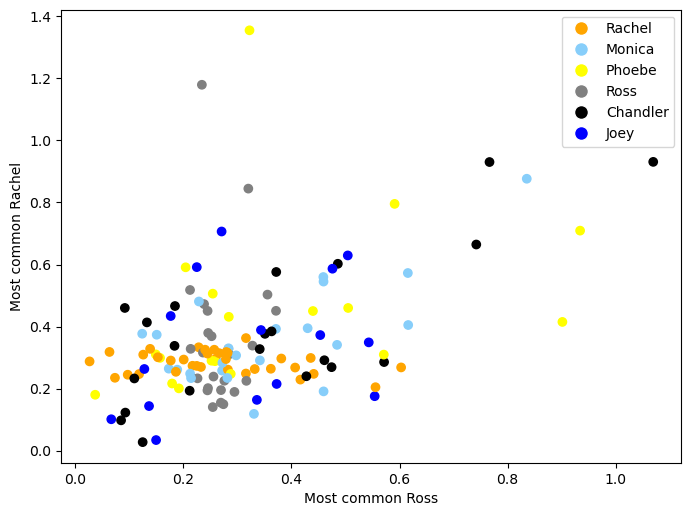

In [55]:
from matplotlib.lines import Line2D
feature1 = "Most common Ross"
feature2 = "Most common Rachel"
xax = X_val[feature1].to_list()
yax = X_val[feature2].to_list()
#plt.figure(figsize=(8,6), dpi=100)
#plt.scatter(xax, yax)

colors=[]
for entry in prediction:
    if entry == "Rachel":
        colors.append("orange")#orange
    elif entry == "Monica":
        colors.append("lightskyblue")#lightskyblue
    elif entry == "Phoebe":
        colors.append("yellow")#yellow
    elif entry == "Ross":
        colors.append("grey")#grey
    elif entry == "Chandler":
        colors.append("black")#black
    else:
        colors.append("blue")#blue

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Rachel', markerfacecolor='orange', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Monica', markerfacecolor='lightskyblue', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Phoebe', markerfacecolor='yellow', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Ross', markerfacecolor='grey', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Chandler', markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Joey', markerfacecolor='blue', markersize=10),]
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
ax.scatter(xax, yax, c = colors)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.legend(handles = legend_elements),

#Text label for every data point
#for i, txt in enumerate(prediction):
#    ax.annotate(txt, (xax[i], yax[i]))
    
plt.show()

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  8 18:24:20 2020

@author: davsu428
"""
import re
import os
import pandas as pd
from heapq import nlargest
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.tag import pos_tag
master_array = [] #append results to array to create data frame

for filename in os.listdir('season/'):
    if filename.endswith(".html"):
        split_name = filename.split('.') #obtain the season and episodes
        season = split_name[0]   
        episode = split_name[1]
        #TODO method to get each line of the script
        master_array.append([season, episode])
    else:
        pass
numblines = dict()
numblines["Episode"] = []
numblines["Number of lines"] = []
numblines["Number of words"] = []
numblines["Different words used"] = []
numblines["Words per line"] = []
numblines["Different words ratio"] = []
numblines["Exclamation marks"] = []
numblines["Question marks"] = []
numblines["Periods"] = []
numblines["Apostrophe"] = []
numblines["Pronouns"] = []
numblines["Pronouns per line"] = []
numblines["Commas"] = []
numblines["Commas per line"] = []
numblines["Word"] = []
numblines["Word2"] = []
numblines["Phrase"] = []
numblines["Phrase2"] = []
numblines["Phrase3"] = []
numblines["Phrase4"] = []
numblines["Most common Monica"] = []
numblines["Most common Rachel"] = []
numblines["Most common Phoebe"] = []
numblines["Most common Chandler"] = []
numblines["Most common Ross"] = []
numblines["Most common Joey"] = []
numblines["Name Monica"] = []
numblines["Name Rachel"] = []
numblines["Name Phoebe"] = []
numblines["Name Chandler"] = []
numblines["Name Ross"] = []
numblines["Name Joey"] = []
numblines["Name total"] = []
#numblines["Most common 30"] = []
#numblines["Most common 50"] = []
numblines["Character"] = []

loop = 0
for num, ep in enumerate(master_array):
#for num in [0]:
    filename=master_array[num][0]+'.'+master_array[num][1]

    f = open('season/'+filename, 'r')
    data = f.read()

    soup = BeautifulSoup(data)
    readsoup = BeautifulSoup(data)

    soup = soup.get_text().translate(str.maketrans({'\n': ' ', '\xa0': ''}))
    pattern = re.compile(r'\s(?=\w+(?=:))') # store the regex
    result = re.split(pattern, soup) # split the script where our pattern matched (pink dot)


    episode_array=[]
    for item in result:
        split_line = item.split(': ')
        try:
            character = split_line[0]
            speech = split_line[1]
            episode_array.append([character, speech])
        except:
            pass
    
    df = pd.DataFrame(episode_array, columns = ['Person','Said'])

    df['Person'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                        'JOEY':'Joey',
                        'MNCA':'Monica','MONICA':'Monica',
                        'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                        'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                        'ROSS':'Ross'},inplace=True)

    curved = re.compile("(\(.*?\))")
    brackets = re.compile("(\[.*?\])")
    scene = re.compile("\[Scene")
    cbreak = re.compile("Commercial break", re.IGNORECASE)
    theend = re.compile("The end", re.IGNORECASE)
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(curved, '', i)

    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(brackets, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(scene, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(cbreak, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(theend, '', i)

    worddicts = {}
    worddicts['Monica'] = {}
    worddicts["Rachel"]={}
    worddicts["Phoebe"]={}
    worddicts["Chandler"]={} 
    worddicts["Ross"]={} 
    worddicts["Joey"]={}
    for i, j in enumerate(df["Person"]):
        if j in worddicts:
            wordlist = Counter((x.rstrip(punctuation).lower() for x in df.iloc[i][1].split()))
            for word in wordlist:
                try:
                    worddicts[j][word] = worddicts[j][word]+1
                except KeyError:
                    worddicts[j][word] = 1
    
    namedict=dict()
    namedict["Rachel"]=[0]*11
    namedict["Phoebe"]=[0]*11
    namedict["Chandler"]=[0]*11
    namedict["Ross"]=[0]*11
    namedict["Joey"]=[0]*11
    namedict["Monica"]=[0]*11
    
    commonwords = {}
    commonwords['Monica']={}
    commonwords["Rachel"]={}
    commonwords["Phoebe"]={}
    commonwords["Chandler"]={} 
    commonwords["Ross"]={} 
    commonwords["Joey"]={}
    for b in namedict:
        for c in namedict:
            commonwords[b][c] = 0

    k = 0
    for i in df["Person"]:
        if i in namedict:
            try:
                namedict[i][0] = namedict[i][0]+1
                namedict[i][1] = namedict[i][1]+Counter(df.iloc[k][1])['!']
                namedict[i][2] = namedict[i][2]+Counter(df.iloc[k][1])['?']
                if "oh my god" in df.iloc[k][1].lower():
                    namedict[i][3] = namedict[i][3]+1
                namedict[i][4] = namedict[i][4]+Counter(df.iloc[k][1])[',']
                namedict[i][5] = namedict[i][5]+Counter(df.iloc[k][1])["'"]
                namedict[i][6] = namedict[i][6]+Counter(df.iloc[k][1])["."]
                text = word_tokenize(df.iloc[k][1])
                tags = pos_tag(text)
                for tag in range(len(tags)):
                    if tags[tag][1] == 'PRP':
                        namedict[i][7]+=1
                if "how you doin" in df.iloc[k][1].lower():
                    namedict[i][8] = namedict[i][8]+1
                if "could you be more" in df.iloc[k][1].lower():
                    namedict[i][9] = namedict[i][9]+1
                if "we were on a break" in df.iloc[k][1].lower():
                    namedict[i][10] = namedict[i][10]+1
            except:
                pass
        k = k+1
            
    
    for p in namedict:
        for person in namedict:
            try:
                numblines["Name "+person].append(worddicts[p][person.lower()])
            except:
                numblines["Name "+person].append(0)
            for word in nlargest(30, worddicts[person], key=worddicts[person].get):
                if word in nlargest(30, mostcommon[p], key=mostcommon[p].get):
                    try:
                        commonwords[p][person] = commonwords[p][person]+worddicts[person][word]
                    except:
                        commonwords[p][person] = worddicts[p][word]
                else:
                    pass
        try:
            numblines["Number of lines"].append(namedict[p][0])
            numblines["Character"].append(p)
            numblines["Episode"].append(master_array[num][0])
            #numblines["Most common 10"].append(nlargest(10, worddicts[p], key=worddicts[p].get))
            #numblines["Most common 30"].append(nlargest(30, worddicts[p], key=worddicts[p].get))
            #numblines["Most common 50"].append(nlargest(50, worddicts[p], key=worddicts[p].get))
            numblines["Number of words"].append(sum(worddicts[p].values()))
            numblines["Different words used"].append(len(worddicts[p]))
            numblines["Exclamation marks"].append(namedict[p][1])
            numblines["Question marks"].append(namedict[p][2])
            numblines["Words per line"].append(sum(worddicts[p].values())/namedict[p][0])
            numblines["Different words ratio"].append(len(worddicts[p])/sum(worddicts[p].values()))
            numblines["Most common Monica"].append(commonwords[p]["Monica"]/sum(worddicts[p].values()))
            numblines["Most common Rachel"].append(commonwords[p]["Rachel"]/sum(worddicts[p].values()))
            numblines["Most common Phoebe"].append(commonwords[p]["Phoebe"]/sum(worddicts[p].values()))
            numblines["Most common Chandler"].append(commonwords[p]["Chandler"]/sum(worddicts[p].values()))
            numblines["Most common Ross"].append(commonwords[p]["Ross"]/sum(worddicts[p].values()))
            numblines["Most common Joey"].append(commonwords[p]["Joey"]/sum(worddicts[p].values()))
            numblines["Name total"].append(numblines["Name Monica"][loop]+
                                              numblines["Name Joey"][loop]+
                                              numblines["Name Rachel"][loop]+
                                              numblines["Name Chandler"][loop]+
                                              numblines["Name Phoebe"][loop]+
                                              numblines["Name Ross"][loop])
            numblines["Phrase"].append(namedict[p][3])
            numblines["Commas"].append(namedict[p][4])
            numblines["Commas per line"].append(namedict[p][4]/namedict[p][0])
            numblines["Apostrophe"].append(namedict[p][5])
            numblines["Periods"].append(namedict[p][6])
            numblines["Pronouns"].append(namedict[p][7])
            numblines["Pronouns per line"].append(namedict[p][7]/namedict[p][0])
            numblines["Phrase2"].append(namedict[p][8])
            numblines["Phrase3"].append(namedict[p][9])
            numblines["Phrase4"].append(namedict[p][10])
            
            try:
                numblines["Word"].append(worddicts[p]["dude"])
            except:
                numblines["Word"].append(0)
            try:
                numblines["Word2"].append(worddicts[p]["crazy"])
            except:
                numblines["Word2"].append(0)
            
        except:
               pass
        loop = loop+1
        
epinfo = pd.DataFrame.from_dict(numblines, orient='index')
epinfo = epinfo.transpose()
epinfo
    #plt.bar(list(namedict.keys()), namedict.values(), color='g')
    #plt.show()
#print(df.iloc[3][1])    
#print(df.iloc[9][1])

,Episode,Number of lines,Number of words,Different words used,Words per line,Different words ratio,Exclamation marks,Question marks,Periods,Apostrophe,...,Most common Ross,Most common Joey,Name Monica,Name Rachel,Name Phoebe,Name Chandler,Name Ross,Name Joey,Name total,Character
0,0101,49,554,277,11.306122,0.5,28,16,92,58,...,0.229242,0.17509,2,0,0,0,0,0,2,Rachel
1,0101,19,218,155,11.473684,0.711009,7,4,41,12,...,0.550459,0.412844,0,0,0,0,0,0,0,Phoebe
2,0101,39,349,212,8.948718,0.60745,9,8,52,34,...,0.352436,0.277937,0,0,0,0,1,1,2,Chandler
3,0101,47,447,263,9.510638,0.588367,14,21,75,41,...,0.288591,0.201342,0,1,0,1,0,1,3,Ross
4,0101,41,394,232,9.609756,0.588832,20,16,49,38,...,0.304569,0.251269,0,0,1,3,4,1,9,Joey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1017-1018,85,712,332,8.376471,0.466292,40,33,78,48,...,0.344101,0.311798,1,5,0,1,4,0,11,Phoebe
1370,1017-1018,83,638,298,7.686747,0.467085,29,29,84,47,...,0.39185,0.344828,1,0,1,0,2,1,5,Chandler
1371,1017-1018,112,719,276,6.419643,0.383866,36,37,122,58,...,0.350487,0.300417,2,5,4,0,0,0,11,Ross
1372,1017-1018,84,687,281,8.178571,0.409025,32,41,87,39,...,0.347889,0.323144,3,1,0,3,2,0,9,Joey


In [3]:
epinfo.to_csv('epinfo.csv', index=False)

In [147]:
import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms
import numpy as np
import pandas as pd
import sklearn.discriminant_analysis as skl_da
import sklearn.preprocessing as skl_pre
import math
import itertools
from sklearn.decomposition import PCA
epinfo = pd.read_csv('epinfo.csv')
#epinfo = epinfo.transpose()
features = [#'Episode', 
            'Number of lines', 
            'Number of words', 
            'Different words used',
            'Words per line', 
            'Different words ratio',
            'Exclamation marks', 
            'Question marks', 
            'Word',
            "Most common Monica",
            "Most common Rachel",
            "Most common Phoebe",
            "Most common Chandler",
            "Most common Ross",
            "Most common Joey",
            #'Most common 10',
            #'Most common 30', 
            #'Most common 50', 
             ]
Y_encode = [4, 3, 0, 5, 1, 2]*229
def aic(model, Y, Y_hat):
    k = model.coef_.size + model.get_params()['fit_intercept'] + 1
    n = Y.size
    loglik = np.sum(np.log(model.predict_proba(X)[np.arange(n), Y_encode]))
    
    return 2 * (k - loglik)

X = epinfo[list(features)]
Y = epinfo['Character']

X_train, X_test, Y_train, Y_test = skl_ms.train_test_split(X,Y, test_size = 0.1)

scaler = skl_pre.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

model = skl_lm.LogisticRegression(solver='newton-cg', multi_class='multinomial', max_iter=10000, 
                                  penalty='l2', fit_intercept = False)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
#Y_hat = model.predict(X)
print(np.mean(prediction==Y_test))
print(pd.crosstab(prediction, Y_test))
#print(aic(model, Y, Y_encode))
print(explained_variance)

0.2536231884057971
Character  Chandler  Joey  Monica  Phoebe  Rachel  Ross
row_0                                                  
Chandler          6     2       3       4       3     5
Joey              5     5       1       3       3     3
Monica            1     1       5       1       2     2
Phoebe            5     4       3       5       5     3
Rachel            2     6       3       4      11     1
Ross              8     7       6       2       5     3
[0.46840425 0.11562561 0.07248058 0.06325476 0.05632501 0.05026848
 0.04039241 0.03596524 0.0311016  0.02967531 0.02044766 0.01369996
 0.00152998 0.00082915]


In [1]:
import re
import os
import pandas as pd
from heapq import nlargest
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
master_array = [] #append results to array to create data frame

for filename in os.listdir('season/'):
    if filename.endswith(".html"):
        split_name = filename.split('.') #obtain the season and episodes
        season = split_name[0]   
        episode = split_name[1]
        #TODO method to get each line of the script
        master_array.append([season, episode])
    else:
        pass
master_df = pd.DataFrame(columns = ['Person','Said'])
for num, ep in enumerate(master_array):
#for num in [0, 1]:
    filename=master_array[num][0]+'.'+master_array[num][1]

    f = open('season/'+filename, 'r')
    data = f.read()

    soup = BeautifulSoup(data)
    readsoup = BeautifulSoup(data)

    soup = soup.get_text().translate(str.maketrans({'\n': ' ', '\xa0': ''}))
    pattern = re.compile(r'\s(?=\w+(?=:))') # store the regex
    result = re.split(pattern, soup) # split the script where our pattern matched (pink dot)


    episode_array=[]
    for item in result:
        split_line = item.split(': ')
        try:
            character = split_line[0]
            speech = split_line[1]
            episode_array.append([character, speech])
        except:
            pass
    
    df = pd.DataFrame(episode_array, columns = ['Person','Said'])

    df['Person'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                        'JOEY':'Joey',
                        'MNCA':'Monica','MONICA':'Monica',
                        'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                        'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                        'ROSS':'Ross'},inplace=True)

    curved = re.compile("(\(.*?\))")
    brackets = re.compile("(\[.*?\])")
    scene = re.compile("\[Scene")
    cbreak = re.compile("Commercial break", re.IGNORECASE)
    theend = re.compile("The end", re.IGNORECASE)
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(curved, '', i)

    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(brackets, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(scene, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(cbreak, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(theend, '', i)
    master_df = master_df.append(df, ignore_index=True)

print(master_df)

         Person                                               Said
0            by           Marta Kauffman & David Crane Transcribed
1            by                  guineapig Additional transcribing
2            by                                   Eric Aasen (Note
3        Monica  There's nothing to tell! He's just some guy I ...
4          Joey  C'mon, you're going out with the guy! There's ...
...         ...                                                ...
62747  Chandler                           Oh, it's gonna be okay. 
62748    Rachel   Do you guys have to go to the new house right...
62749    Monica                                  We got some time.
62750    Rachel                   Okay, should we get some coffee?
62751  Chandler                                 Sure. Where?      

[62752 rows x 2 columns]


In [17]:
import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms
import numpy as np
from zeugma.embeddings import EmbeddingTransformer
corpus = []
Y = []
charlist = ["Chandler", "Joey", "Ross", "Monica", "Rachel", "Phoebe"]
for i, j in enumerate(master_df['Person']):
    if j in charlist:
        Y.append(master_df["Person"][i])
        corpus.append(master_df["Said"][i].rstrip(punctuation).lower())
        
corpus_train, corpus_test, Y_train, Y_test = skl_ms.train_test_split(corpus, Y, test_size = 0.1 , random_state=1)

glove = EmbeddingTransformer('glove')
X_train = glove.transform(corpus_train)

model = skl_lm.LogisticRegression(solver='newton-cg', multi_class='multinomial', max_iter=10000, 
                                  penalty='l2', fit_intercept = False)
model.fit(X_train, Y_train)

X_test = glove.transform(corpus_test)
prediction = model.predict(X_test)
print(np.mean(prediction==Y_test))

0.2009273570324575


C:\Users\Leon\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Leon\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [27]:
from nltk import word_tokenize
from nltk.tag import pos_tag
#import nltk
#import nltk
#nltk.download('punkt')
text = word_tokenize(df["Said"][4])
tags = pos_tag(text)
pronoun = 0
for tag in range(len(tags)):
    if tags[tag][1] == 'PRP':
        pronoun+=1
print(pronoun)
print(tags)

4
[('Yeah', 'UH'), (',', ','), ('you', 'PRP'), ('know', 'VBP'), (',', ','), ('maybe', 'RB'), ('I', 'PRP'), ('ate', 'VBP'), ('too', 'RB'), ('much', 'JJ'), ('.', '.'), ('I', 'PRP'), ('keep', 'VBP'), ('getting', 'VBG'), ('these', 'DT'), ('stomach-aches', 'NNS'), ('.', '.'), ('They', 'PRP'), ('come', 'VBP'), ('and', 'CC'), ('go', 'VBP'), ('like', 'IN'), ('every', 'DT'), ('few', 'JJ'), ('minutes', 'NNS'), ('.', '.')]


In [17]:
from heapq import nlargest
from collections import Counter
from string import punctuation
worddicts = {}
worddicts['Monica'] = {}
worddicts["Rachel"]={}
worddicts["Phoebe"]={}
worddicts["Chandler"]={} 
worddicts["Ross"]={} 
worddicts["Joey"]={}
for i, j in enumerate(df["Person"]):
    if j in worddicts:
        wordlist = Counter((x.rstrip(punctuation).lower() for x in df.iloc[i][1].split()))
        for word in wordlist:
            try:
                worddicts[j][word] = worddicts[j][word]+1
            except KeyError:
                worddicts[j][word] = 1
#print('Monica\'s most common words: ')
#worddicts['Monica']
largestword = nlargest(156, worddicts['Phoebe'], key=worddicts['Phoebe'].get)
print(largestword)

['i', 'oh', 'just', 'to', 'what', 'a', 'you', 'he', "don't", 'want', 'with', 'my', 'on', 'that', 'your', 'does', 'her', 'go', 'no', 'ooh', 'be', 'of', 'and', 'it', 'out', "can't", 'but', 'break', 'like', 'the', 'first', 'was', 'had', 'here', 'believe', 'wait', 'eat', 'chalk', "'cause", 'through', 'went', 'carl', 'fine', 'murky', 'if', 'let', 'hair', 'head', 'will', 'fall', 'off', 'raindrops', 'roses', 'rabbits', 'kittens', 'bluebells', 'sleighbells', 'something', 'mittens', 'la', 'la...something', 'noodles', 'string', 'these', 'are', 'few', 'helped', 'mean', 'sell', 'drink', 'or', 'complain', 'lot', 'pulled', 'four', 'eyelashes', 'good', 'wish', 'could', 'commercial', 'love', 'is', 'sweet', 'as', 'summer', 'showers', 'wondrous', 'work', 'art', 'love...is', 'giant', 'pigeon...crapping', 'heart', 'la-la-la-la-la', 'thank', 'la-la-la-la...ohhh', 'hate', 'put', 'into', 'universe', 'all', 'right', "c'mere", 'gimme', 'feet', 'give', "it's", 'hard', 'being', 'own', 'for', 'time', "you're", 'w

0       22
1        7
2       13
3        9
4        8
5       21
6        6
7        4
8       11
9       24
10       2
11      12
12       8
13      10
14      19
15      10
16       5
17      15
18      15
19       8
20       9
21       6
22       2
23      12
24      12
25       6
26       8
27       7
28      19
29      20
30       6
31      13
32      25
33       7
34      22
35      11
36      20
37      13
38      11
39      15
40       8
41       4
42       4
43       6
44      16
45       9
46       1
47       4
48      11
49       6
50      16
51      11
52       9
53       8
54      16
55      18
56      16
57      14
58       3
59       5
60      10
61       9
62      15
63      19
64      11
65       9
66       7
67       6
68       3
69      15
70       8
71       8
72       6
73       6
74       2
75       1
76      19
77       1
78       3
79       0
80      12
81      13
82       3
83       5
84       2
85      11
86      29
87       6
88       7
89      15
90      10

In [29]:
df.iloc[4][1]

'Yeah, you know, maybe I ate too much. I keep getting these    stomach-aches. They come and go like every few minutes.'

In [32]:
questiondict = dict()
questiondict["Rachel"] = 0
questiondict["Phoebe"] = 0
questiondict["Chandler"] = 0
questiondict["Ross"] = 0
questiondict["Joey"] = 0
questiondict["Monica"] = 0

k = 0
for i in df["Person"]:
    if i in namedict:
        try:
            namedict[i]=namedict[i]+1
            exclamationdict[i] = exclamationdict[i]+Counter(df.iloc[k][1])['!']
            questiondict[i] = questiondict[i]+Counter(df.iloc[k][1])['?']
        except:
            pass
    k = k+1
questiondict

{'Rachel': 16,
 'Phoebe': 4,
 'Chandler': 8,
 'Ross': 21,
 'Joey': 16,
 'Monica': 40}

In [39]:
pd.set_option('display.max_rows', df.shape[0]+1)
pdf = df[df['Person'] == 'Phoebe']
pdf

,Person,Said
6,Phoebe,"Wait, does he eat chalk?"
7,Phoebe,"Just, 'cause, I don't want her to go through w..."
16,Phoebe,No.
29,Phoebe,Ooh! Oh!
31,Phoebe,Fine! Be murky!
60,Phoebe,"If I let go of my hair, my head will fall off."
70,Phoebe,"Raindrops on roses and rabbits and kittens, ..."
72,Phoebe,I helped!
93,Phoebe,"What does that mean? Does he sell it, drink i..."
100,Phoebe,"Ooh, I just pulled out four eyelashes. That ca..."


In [44]:
for i in range(19):
    print(pdf.iloc[i][1])

Wait, does he eat chalk? 
Just, 'cause, I don't want her to go through what I went through with Carl- oh!
No.
Ooh! Oh! 
Fine! Be murky!
If I let go of my hair, my head will fall off. 
 Raindrops on roses and rabbits and kittens,  bluebells and sleighbells and- something with mittens... La la la la...something and noodles with string. These are a few...
 I helped!
What does that mean?  Does he sell it, drink it, or just complain a lot?  
Ooh, I just pulled out four eyelashes. That can't be good. 
Oh, I wish I could, but I don't want to. Commercial Break 
 Love is sweet as summer showers, love is a wondrous work of art, but your love oh your love, your love...is like a giant pigeon...crapping on my heart. La-la-la-la-la-  Thank you.  La-la-la-la...ohhh! 
Oh no, don't hate, you don't want to put that out into the universe.
All right, c'mere, gimme your feet.  
Give her a break, it's hard being on your own for the first time. 
You're welcome. I remember when I first came to this city. I wa

In [49]:
readtest = pd.read_csv('epinfo.csv')
readtest

,Episode,Number of lines,Number of words,Different words used,Exclamation marks,Question marks,Most common 10,Most common 30,Most common 50,Character
0,101,49,554,277,28,16,"['i', 'you', 'just', 'a', ""i'm"", 'be', 'to', '...","['i', 'you', 'just', 'a', ""i'm"", 'be', 'to', '...","['i', 'you', 'just', 'a', ""i'm"", 'be', 'to', '...",Rachel
1,101,19,220,156,7,4,"['i', 'oh', 'just', 'to', 'what', 'a', 'you', ...","['i', 'oh', 'just', 'to', 'what', 'a', 'you', ...","['i', 'oh', 'just', 'to', 'what', 'a', 'you', ...",Phoebe
2,101,39,350,212,9,8,"['a', 'i', 'and', 'it', ""i'm"", 'is', 'all', 'o...","['a', 'i', 'and', 'it', ""i'm"", 'is', 'all', 'o...","['a', 'i', 'and', 'it', ""i'm"", 'is', 'all', 'o...",Chandler
3,101,47,449,265,14,21,"['i', 'you', 'no', 'to', 'the', 'a', 'it', 'an...","['i', 'you', 'no', 'to', 'the', 'a', 'it', 'an...","['i', 'you', 'no', 'to', 'the', 'a', 'it', 'an...",Ross
4,101,41,394,232,20,16,"['a', 'you', 'the', 'i', 'with', 'that', 'and'...","['a', 'you', 'the', 'i', 'with', 'that', 'and'...","['a', 'you', 'the', 'i', 'with', 'that', 'and'...",Joey
5,101,73,597,291,25,40,"['you', 'i', 'and', 'okay', 'that', 'to', 'jus...","['you', 'i', 'and', 'okay', 'that', 'to', 'jus...","['you', 'i', 'and', 'okay', 'that', 'to', 'jus...",Monica


In [64]:
pd.set_option('display.max_rows', epinfo.transpose().shape[0]+1)
epinfo.transpose()

,Episode,Number of lines,Number of words,Different words used,Words per line,Different words ratio,Exclamation marks,Question marks,Most common 10,Most common 30,Most common 50,Character
0,0101,49,554,277,11.3061,0.5,28,16,"[i, you, just, a, i'm, be, to, this, that, on]","[i, you, just, a, i'm, be, to, this, that, on,...","[i, you, just, a, i'm, be, to, this, that, on,...",Rachel
1,0101,19,220,156,11.5789,0.709091,7,4,"[i, oh, just, to, what, a, you, he, don't, want]","[i, oh, just, to, what, a, you, he, don't, wan...","[i, oh, just, to, what, a, you, he, don't, wan...",Phoebe
2,0101,39,350,212,8.97436,0.605714,9,8,"[a, i, and, it, i'm, is, all, of, don't, that]","[a, i, and, it, i'm, is, all, of, don't, that,...","[a, i, and, it, i'm, is, all, of, don't, that,...",Chandler
3,0101,47,449,265,9.55319,0.5902,14,21,"[i, you, no, to, the, a, it, and, okay, my]","[i, you, no, to, the, a, it, and, okay, my, do...","[i, you, no, to, the, a, it, and, okay, my, do...",Ross
4,0101,41,394,232,9.60976,0.588832,20,16,"[a, you, the, i, with, that, and, what, it, yo...","[a, you, the, i, with, that, and, what, it, yo...","[a, you, the, i, with, that, and, what, it, yo...",Joey
5,0101,73,597,291,8.17808,0.487437,25,40,"[you, i, and, okay, that, to, just, is, it, a]","[you, i, and, okay, that, to, just, is, it, a,...","[you, i, and, okay, that, to, just, is, it, a,...",Monica
6,0102,38,329,200,8.65789,0.607903,13,18,"[you, oh, i, in, it, and, so, are, got, i'm]","[you, oh, i, in, it, and, so, are, got, i'm, n...","[you, oh, i, in, it, and, so, are, got, i'm, n...",Rachel
7,0102,13,99,78,7.61538,0.787879,10,0,"[yeah, she's, it's, i, like, it, that, monica,...","[yeah, she's, it's, i, like, it, that, monica,...","[yeah, she's, it's, i, like, it, that, monica,...",Phoebe
8,0102,16,207,153,12.9375,0.73913,2,6,"[i, the, a, is, you, to, in, of, think, for]","[i, the, a, is, you, to, in, of, think, for, a...","[i, the, a, is, you, to, in, of, think, for, a...",Chandler
9,0102,62,570,285,9.19355,0.5,8,33,"[i, uh, you, the, with, well, in, be, i'm, that]","[i, uh, you, the, with, well, in, be, i'm, tha...","[i, uh, you, the, with, well, in, be, i'm, tha...",Ross


In [82]:
for num, ep in enumerate(master_array):
    print(num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228


In [203]:
worddicts["Rachel"]

{'so': 7,
 'if': 2,
 'you': 22,
 'think': 2,
 'i': 34,
 "didn't": 3,
 'say': 3,
 'goodbye': 3,
 'to': 13,
 'because': 4,
 "don't": 3,
 'mean': 2,
 'as': 1,
 'much': 2,
 'me': 10,
 'everybody': 1,
 'else': 1,
 "you're": 4,
 'wrong': 3,
 "it's": 2,
 'more': 2,
 'what': 10,
 'shh': 1,
 'go': 5,
 'back': 2,
 'sleep': 1,
 'have': 8,
 'home': 2,
 'it': 10,
 'really': 3,
 'was': 7,
 "you've": 1,
 'learned': 1,
 'some': 4,
 'new': 2,
 'moves': 1,
 'ah': 1,
 'know': 6,
 'opening': 1,
 'credits': 1,
 'morning': 1,
 'hey': 2,
 'good': 2,
 'chick': 1,
 'and': 7,
 'the': 13,
 'duck': 1,
 'they': 1,
 'die': 1,
 'too': 4,
 'last': 2,
 'night': 2,
 'just': 10,
 'wonderful': 1,
 'woke': 1,
 'up': 4,
 'today': 1,
 'with': 7,
 'biggest': 1,
 'smile': 1,
 'on': 6,
 'my': 14,
 'face': 2,
 'uh-huh': 1,
 'perfect': 1,
 'way': 3,
 'hi': 5,
 'dropped': 1,
 'emma': 3,
 'off': 6,
 'at': 1,
 "mom's": 1,
 'no': 2,
 'we': 3,
 'decided': 1,
 'that': 6,
 'would': 3,
 'ahead': 1,
 'set': 1,
 'first': 1,
 'then': 1,
 '

In [28]:
epinfo["Character"]

0         Rachel
1         Phoebe
2       Chandler
3           Ross
4           Joey
          ...   
1369      Phoebe
1370    Chandler
1371        Ross
1372        Joey
1373      Monica
Name: Character, Length: 1374, dtype: object

In [208]:
newdict = dict(worddicts["Rachel"].items()+worddicts["Monica"].items())

TypeError: unsupported operand type(s) for +: 'dict_items' and 'dict_items'

In [222]:
master_most_common = pd.DataFrame.from_dict(mostcommon, orient='index')

In [32]:
epinfo

,Episode,Number of lines,Number of words,Different words used,Words per line,Different words ratio,Exclamation marks,Question marks,Word,Most common Monica,...,Most common Ross,Most common Joey,Name Monica,Name Rachel,Name Phoebe,Name Chandler,Name Ross,Name Joey,Name total,Character
0,0101,49,554,277,11.306122,0.5,28,16,0,0.32491,...,0.229242,0.17509,2,0,0,0,0,0,2,Rachel
1,0101,19,220,156,11.578947,0.709091,7,4,0,0.813636,...,0.545455,0.409091,0,0,0,0,0,0,0,Phoebe
2,0101,39,350,212,8.974359,0.605714,9,8,0,0.528571,...,0.351429,0.277143,0,0,0,0,1,1,2,Chandler
3,0101,47,449,265,9.553191,0.5902,14,21,0,0.387528,...,0.287305,0.200445,0,1,0,1,0,1,3,Ross
4,0101,41,394,232,9.609756,0.588832,20,16,0,0.482234,...,0.304569,0.251269,0,0,1,3,4,1,9,Joey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1017-1018,85,712,332,8.376471,0.466292,40,33,0,0.247191,...,0.344101,0.311798,1,5,0,1,4,0,11,Phoebe
1370,1017-1018,83,642,301,7.73494,0.468847,29,29,0,0.292835,...,0.389408,0.342679,1,0,1,0,2,1,5,Chandler
1371,1017-1018,112,719,276,6.419643,0.383866,36,37,0,0.255911,...,0.350487,0.300417,2,5,4,0,0,0,11,Ross
1372,1017-1018,84,687,281,8.178571,0.409025,32,41,0,0.256186,...,0.347889,0.323144,3,1,0,3,2,0,9,Joey


{'so': 7,
 'if': 2,
 'you': 22,
 'think': 2,
 'i': 34,
 "didn't": 3,
 'say': 3,
 'goodbye': 3,
 'to': 13,
 'because': 4,
 "don't": 3,
 'mean': 2,
 'as': 1,
 'much': 2,
 'me': 10,
 'everybody': 1,
 'else': 1,
 "you're": 4,
 'wrong': 3,
 "it's": 2,
 'more': 2,
 'what': 10,
 'shh': 1,
 'go': 5,
 'back': 2,
 'sleep': 1,
 'have': 8,
 'home': 2,
 'it': 10,
 'really': 3,
 'was': 7,
 "you've": 1,
 'learned': 1,
 'some': 4,
 'new': 2,
 'moves': 1,
 'ah': 1,
 'know': 6,
 'opening': 1,
 'credits': 1,
 'morning': 1,
 'hey': 2,
 'good': 2,
 'chick': 1,
 'and': 7,
 'the': 13,
 'duck': 1,
 'they': 1,
 'die': 1,
 'too': 4,
 'last': 2,
 'night': 2,
 'just': 10,
 'wonderful': 1,
 'woke': 1,
 'up': 4,
 'today': 1,
 'with': 7,
 'biggest': 1,
 'smile': 1,
 'on': 6,
 'my': 14,
 'face': 2,
 'uh-huh': 1,
 'perfect': 1,
 'way': 3,
 'hi': 5,
 'dropped': 1,
 'emma': 3,
 'off': 6,
 'at': 1,
 "mom's": 1,
 'no': 2,
 'we': 3,
 'decided': 1,
 'that': 6,
 'would': 3,
 'ahead': 1,
 'set': 1,
 'first': 1,
 'then': 1,
 '

In [64]:
phrase = "Hey, how you doin'?"
if "how you doi" in phrase.lower():
    print("Yes")

Yes


In [246]:
commonwords = {}
commonwords['Monica']={}
commonwords["Rachel"]={}
commonwords["Phoebe"]={}
commonwords["Chandler"]={} 
commonwords["Ross"]={} 
commonwords["Joey"]={}
for b in namedict:
    for c in namedict:
        commonwords[b][c] = 0

In [271]:
for p in namedict:
    for person in namedict:
        for word in nlargest(10, worddicts[person], key=worddicts[person].get):
            if word in nlargest(10, mostcommon[p], key=mostcommon[p].get):
                print(word)

you
oh
i
it
and
i
it
that
you
i
the
a
you
to
i
you
the
that
you
i
it
you
oh
i
it
and
so
i
it
that
you
i
the
a
you
to
i
you
the
that
you
i
it
you
i
it
and
i
it
that
you
i
the
a
is
you
to
i
you
the
that
you
i
is
it
you
i
it
and
i
it
that
you
i
the
a
is
you
to
i
you
the
that
you
i
is
it
you
i
it
and
i
it
that
you
i
the
a
you
to
i
you
the
that
you
i
it
you
oh
i
it
and
i
it
that
you
i
the
a
you
to
i
you
the
that
you
i
it


In [16]:
#some_list = ["oh my god, what are you doing", "god oh god why do this to my friends", "i can't believe it, oh my god"]
#matching = [s for s in some_list if "oh my god" in s]
#matching
#[s for s in df["Said"] if "oh my god" in s]
i = 0
saidlist = [s.lower() for s in df["Said"].tolist()]
for 
if df["Person"] == "Monica":
    

['marta kauffman & david crane    directed',
 'kevin bright  transcribed',
 'kreidy ',
 'erica, are you okay?',
 'yeah, you know, maybe i ate too much. i keep getting these    stomach-aches. they come and go like every few minutes.',
 'oh my god!',
 "relax! we'll just get her some antacids.",
 "she doesn't have a stomach-ache. she's in labor!",
 'oh my god!  ',
 "so if you think i didn't say goodbye to you because you don't    mean as much to me as everybody else, you're wrong. it's because you    mean more to me.",
 'rach!',
 'what?!   ',
 'hey.',
 'shh.. go back to sleep. i have to go home.',
 'oh. this was amazing.',
 "it really was. you've learned some new moves!",
 'yeah, well, this guy at work gave me "sex for dummies" as a    joke.',
 'ah.',
 "who's laughing now?",
 'i know!   opening credits ',
 'breathe, breathe, breathe... good.',
 'next time, can i say breathe?',
 'no, last time you said it like dracula, and it scared her! can    i get you anything? you want some more ice ch

In [6]:
lista1 = []
lista2 = []
dict1 = {"one": 1}
for i in namedict
    try:
        lista1.append(dict1["one"])
        lista2.append(dict1["two"])
    except:
        lista1.append(0)
        lista2.append(0)
print(lista1)
print(lista2)

[1, 0]
[0]


In [26]:
list1 = [1,2,3]
list2 = [1,2,3]
list3 = []
for num in range(3):
    list3.append(list1[num]+list2[num])
list3

[2, 4, 6]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
docs = ['oh wait you suck',
        'why oh why',
        'why won\'t you wait']
count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs)
# X[X > 0] = 1 # run this line if you don't want extra within-text cooccurence (see below)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc) # print out matrix in dense format
import scipy.sparse as sp
Xc = (X.T * X)
g = sp.diags(1./Xc.diagonal())
Xc_norm = g * Xc # normalized co-occurence matrix

  (3, 0)	2
  (1, 0)	1
  (5, 0)	1
  (2, 0)	1
  (0, 0)	0
  (1, 1)	0
  (5, 1)	1
  (2, 1)	1
  (0, 1)	1
  (4, 2)	1
  (3, 2)	1
  (1, 2)	1
  (5, 2)	2
  (2, 2)	0
  (0, 2)	1
  (4, 3)	1
  (5, 3)	1
  (2, 3)	1
  (3, 3)	0
  (0, 3)	2
  (4, 4)	0
  (3, 4)	1
  (5, 4)	1
  (2, 4)	1
  (4, 5)	1
  (3, 5)	1
  (1, 5)	1
  (5, 5)	0
  (2, 5)	2
  (0, 5)	1
